# RAVDESS - Emotional-Speech-Classification

#### This ipython file contanis only data loading, Descriptive analysis and Exploratory data analysis modeules.
#### Labels are extracted from loaded audio files and save it as a CSV file - data.csv
#### Also audio intensities - Strong and Normal extracted and saved in two seperate csv file for deep learning implementation
#### Strong Intensity : data_strong.csv
#### Normal Intensity : data_normal.csv
#### List of complete papers, blogs, git repositories refered for implementation and model design is listed in this document.

Project Details: Audio - Emotion classification

Language : Python

DL Library: Pytorch - GPU

Dataset  :  https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio

Datafolder : working_directory/archive/Actor_No/filename.wav

Model Save: working_directory/models

Data citation :  "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

### Implementation Details:

Step-1: Descriptive Analysis

Step-2: Base CNN model

Step-3: Hybrid CNN-Transformer model

Step-5: Emotion Classification for Strong intensity

Step-6: Emotion Classification for Normal intensity

#### Ryerson Audio-Visual Database - Data Description

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [8]:
import os   # for interacting with the operating system,  include many functions to interact with the file system
import numpy as np  # Python library used for working with arrays
import pandas as pd  #data manipulation and analysis
import matplotlib.pyplot as plt  # for visualization
from sklearn.model_selection import train_test_split   # data preprossesing - train and test split, ML algorithm package
import seaborn as sns  # for visualization

In [9]:
import warnings    # to avoid warning during executions
warnings.filterwarnings("ignore")

In [10]:
import torch   # PyTorch is an open source machine learning and deep learning library based on the Torch library, 
import torchaudio  #provides powerful audio I/O functions, preprocessing transforms and dataset
import librosa   # python package for music and audio analysis
import librosa.display # Display a spectrogram/chromagram/cqt/etc

In [11]:
data = pd.DataFrame(columns=['Path', 'Emotion', 'Emotion_intensity','Gender']) 

In [12]:
speech_dir = './archive'
actors = [dir for dir in os.listdir(speech_dir) if dir.startswith('Actor_')]
print(actors)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


Created a data frame with required column

Assigned the audio file directory to variable speech_dir

Each audio directory corresponding to the Actor is assigned to actor variable using OS package

In [13]:
# Iterated through every data folders and the data 
for dir in actors:
    act_dir = os.path.join(speech_dir,dir)
    for wav in os.listdir(act_dir):
        # get file name with labels
        identifiers = wav.split('.')[0].split('-')
        # Extracted file name and stored it in list after spliting
        emotion = (int(identifiers[2]))
        # lable corrsponding to emotion is stored in variable emotion
        emotion_intensity = (int(identifiers[3]))
        if emotion == 8:
            emotion = 0
        # chage emotion label 8 to zero
        if int(identifiers[6])%2 == 0:
            gender = 'female'
        else:
            gender = 'male'
        # extracted gender lable based on label value (even for female and odd for male)
        file_path = os.path.join(act_dir, wav).replace("\\","/")
        # chage the path representation in windows
        data = data.append({"Path": file_path,
                            "Emotion": emotion,
                            "Emotion_intensity": emotion_intensity,
                            "Gender": gender,
                             },
                             ignore_index = True
                          )
        # Append the extrated labels to data frame.

Each audio file is assigned to variable "identifiers" iteratively. File path, Emotion, emotion intensity and gender value
are appeneded to created data frame. Value corrsponding to  emotion surprised is changed from 08 to 00. Gender is assigned based on odd or even gender value

In [14]:
data

,Path,Emotion,Emotion_intensity,Gender
0,./archive/Actor_01/03-01-01-01-01-01-01.wav,1,1,male
1,./archive/Actor_01/03-01-01-01-01-02-01.wav,1,1,male
2,./archive/Actor_01/03-01-01-01-02-01-01.wav,1,1,male
3,./archive/Actor_01/03-01-01-01-02-02-01.wav,1,1,male
4,./archive/Actor_01/03-01-02-01-01-01-01.wav,2,1,male
...,...,...,...,...
1435,./archive/Actor_24/03-01-08-01-02-02-24.wav,0,1,female
1436,./archive/Actor_24/03-01-08-02-01-01-24.wav,0,2,female
1437,./archive/Actor_24/03-01-08-02-01-02-24.wav,0,2,female
1438,./archive/Actor_24/03-01-08-02-02-01-24.wav,0,2,female


In [15]:
data.to_csv(r'./data.csv', index = False)  # saved the lable data feame to CSV file for reusability

In [16]:
audio_df = pd.read_csv('data.csv')  # reading data from csv to data frame again

In [17]:
print(len(audio_df))

1440


In [18]:
audio_df.head()

,Path,Emotion,Emotion_intensity,Gender
0,./archive/Actor_01/03-01-01-01-01-01-01.wav,1,1,male
1,./archive/Actor_01/03-01-01-01-01-02-01.wav,1,1,male
2,./archive/Actor_01/03-01-01-01-02-01-01.wav,1,1,male
3,./archive/Actor_01/03-01-01-01-02-02-01.wav,1,1,male
4,./archive/Actor_01/03-01-02-01-01-01-01.wav,2,1,male


In [19]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Path               1440 non-null   object
 1   Emotion            1440 non-null   int64 
 2   Emotion_intensity  1440 non-null   int64 
 3   Gender             1440 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.1+ KB


In [20]:
audio_df['Emotion'].value_counts()  # value count of each emotion lables are returned

0    192
2    192
3    192
4    192
5    192
6    192
7    192
1     96
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

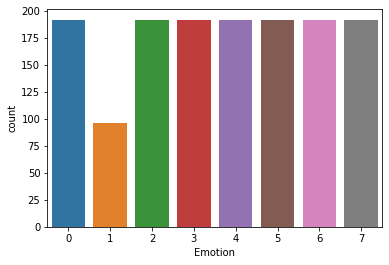

In [21]:
sns.countplot(x ='Emotion', data = audio_df)  # Count plot for each emotions using seaborn library

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 00 = surprised).

<AxesSubplot:xlabel='Emotion_intensity', ylabel='count'>

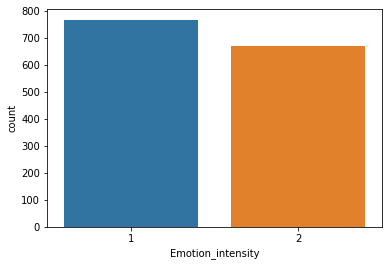

In [22]:
sns.countplot(x ='Emotion_intensity', data = audio_df)  # count plot based on emotion intensity

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

<AxesSubplot:xlabel='Gender', ylabel='count'>

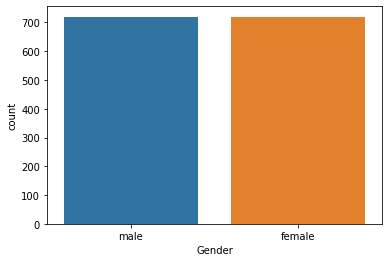

In [23]:
sns.countplot(x ='Gender', data = audio_df)  # count plot based on Actor gender

# Audio Signal Analysis
____________________________________________________________

In [27]:
# funtion to verify the number of channel in audio
def verify_channel(Dataframe):
    for i,audio_file in enumerate(Dataframe["Path"]):
        data, rate = torchaudio.load(audio_file)
        data_shape = list(data.shape)
        if data_shape[0] != 1:
            print(f"index: {i}, shape : {data.shape}")
    
verify_channel(audio_df)
del verify_channel # to free up the memory

index: 5, shape : torch.Size([2, 172972])
index: 55, shape : torch.Size([2, 156956])
index: 247, shape : torch.Size([2, 203403])
index: 1154, shape : torch.Size([2, 166566])
index: 1177, shape : torch.Size([2, 209809])


This function will take a dataframe as input and loop throught it searching for multichannel audio, 
if found it will print the shape as a Tensor and its index in the dataframe

In [31]:
def plot_audio_signal(audio_path):
    #load an individual sample audio file
    y, sr = librosa.load(audio_path, sr=None,mono=True)
    print(f" Audio Sample rate : {sr}")
  
    # trim silent edges of the audio
    audio, _ = librosa.effects.trim(y)
  
    fig = plt.figure(figsize=(20,15))
    n_fft = 2048
    hop_length = 256
    n_mels = 128
    
    #ploting the audio wave time x amplitude
    plt.subplot(2,2,1)
    librosa.display.waveplot(audio, sr=sr);
    plt.title('1. Raw audio wave form');

    # Ploting fourier transform of the wave
    plt.subplot(2,2,2)
    D = np.abs(librosa.stft(audio[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
    plt.plot(D);
    plt.title(f'2. fourier transform of a window(length={n_fft})');

    #Ploting spectrogram time x freequency
    plt.subplot(2,2,3)
    D = np.abs(librosa.stft(audio, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.title('4. Spectrogram');

    #Ploting Mel spectrogram time x freequency
    plt.subplot(2,2,4)
    S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
    plt.title('9. Mel - Spectrogram');

    fig.tight_layout() 
    plt.show()

In [32]:
path = audio_df.iloc[45]["Path"]
print(audio_df.iloc[45]["Emotion"])

7


 Audio Sample rate : 48000


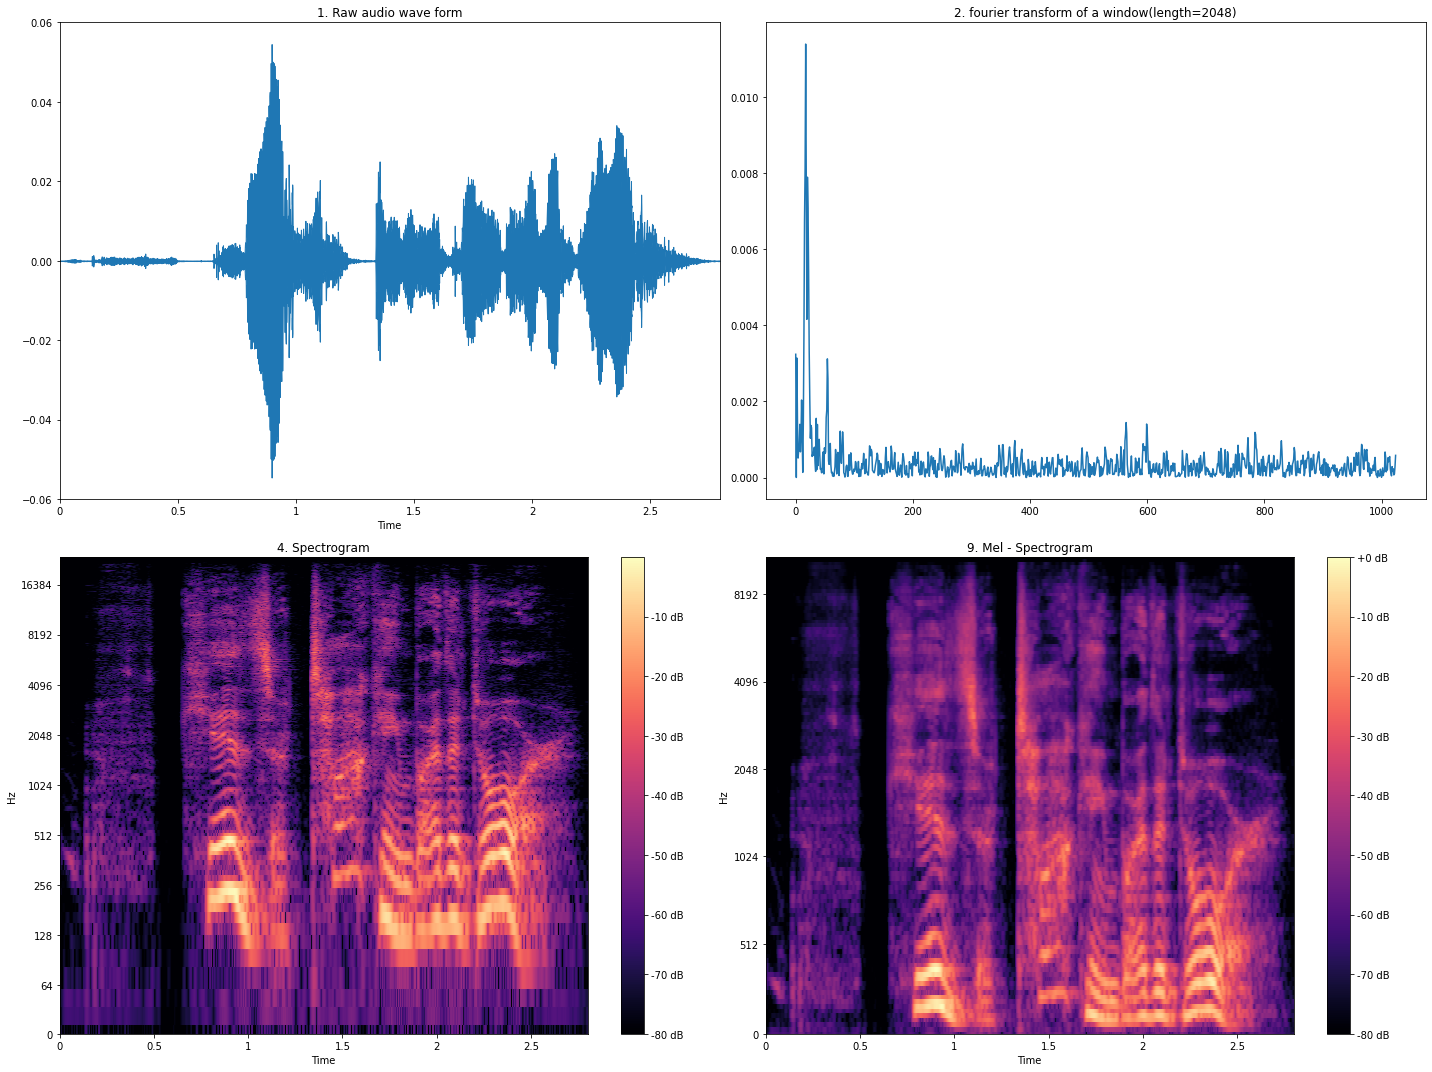

In [33]:
plot_audio_signal(path)

# Data Subsetting - Neutral & Strong

Data is subsetting based on emotional intensity ie Normal and Strong.

Values are first stored in two seperate data frames and then write it into two separate CSV file to resuse it again

In [34]:
# saving only normal emotional intensity data
audio_normal = audio_df[audio_df.Emotion_intensity == 1] 
audio_normal.to_csv(r'./data_normal.csv', index = False)

In [35]:
# saving only strong emotional intensity data
audio_strong = audio_df[audio_df.Emotion_intensity == 2]
audio_strong.to_csv(r'./data_strong.csv', index = False)

In [37]:
audio_normal.head()

,Path,Emotion,Emotion_intensity,Gender
0,./archive/Actor_01/03-01-01-01-01-01-01.wav,1,1,male
1,./archive/Actor_01/03-01-01-01-01-02-01.wav,1,1,male
2,./archive/Actor_01/03-01-01-01-02-01-01.wav,1,1,male
3,./archive/Actor_01/03-01-01-01-02-02-01.wav,1,1,male
4,./archive/Actor_01/03-01-02-01-01-01-01.wav,2,1,male


In [38]:
audio_strong.head()

,Path,Emotion,Emotion_intensity,Gender
8,./archive/Actor_01/03-01-02-02-01-01-01.wav,2,2,male
9,./archive/Actor_01/03-01-02-02-01-02-01.wav,2,2,male
10,./archive/Actor_01/03-01-02-02-02-01-01.wav,2,2,male
11,./archive/Actor_01/03-01-02-02-02-02-01.wav,2,2,male
16,./archive/Actor_01/03-01-03-02-01-01-01.wav,3,2,male


# End to End Data loading and Visualization

In [43]:
def load_data():
    e2e_data = pd.DataFrame(columns=['Path', 'Emotion', 'Emotion_intensity','Gender'])
    speech_dir = './archive'
    actors = [dir for dir in os.listdir(speech_dir) if dir.startswith('Actor_')]
    
    for dir in actors:
        act_dir = os.path.join(speech_dir,dir)
        for wav in os.listdir(act_dir):
            # get file name with labels
            identifiers = wav.split('.')[0].split('-')
            # Extracted file name and stored it in list after spliting
            emotion = (int(identifiers[2]))
            # lable corrsponding to emotion is stored in variable emotion
            emotion_intensity = (int(identifiers[3]))
            if emotion == 8:
                emotion = 0
            # chage emotion label 8 to zero
            if int(identifiers[6])%2 == 0:
                gender = 'female'
            else:
                gender = 'male'
            # extracted gender lable based on label value (even for female and odd for male)
            file_path = os.path.join(act_dir, wav).replace("\\","/")
            # chage the path representation in windows
            e2e_data = e2e_data.append({"Path": file_path,
                                "Emotion": emotion,
                                "Emotion_intensity": emotion_intensity,
                                "Gender": gender,
                                 },
                                 ignore_index = True
                              )
            # Append the extrated labels to data frame.
            
    return e2e_data

In [48]:
def data_descriptive():
    e2e_data = load_data()
    print(e2e_data.head())
    print(e2e_data.info())
    print(len(e2e_data))
    print(e2e_data['Emotion'].value_counts())
    sns.countplot(x ='Emotion', data = e2e_data)

                                          Path Emotion Emotion_intensity  \
0  ./archive/Actor_01/03-01-01-01-01-01-01.wav       1                 1   
1  ./archive/Actor_01/03-01-01-01-01-02-01.wav       1                 1   
2  ./archive/Actor_01/03-01-01-01-02-01-01.wav       1                 1   
3  ./archive/Actor_01/03-01-01-01-02-02-01.wav       1                 1   
4  ./archive/Actor_01/03-01-02-01-01-01-01.wav       2                 1   

  Gender  
0   male  
1   male  
2   male  
3   male  
4   male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Path               1440 non-null   object
 1   Emotion            1440 non-null   object
 2   Emotion_intensity  1440 non-null   object
 3   Gender             1440 non-null   object
dtypes: object(4)
memory usage: 45.1+ KB
None
1440
0    192
2    192
3    192
4    192
5 

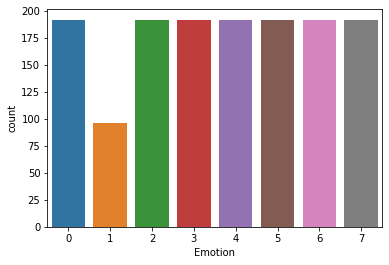

In [49]:
data_descriptive()

# Input Function based signal visualization

enter audio location value between 0 to 1439 :77
 Audio Sample rate : 48000


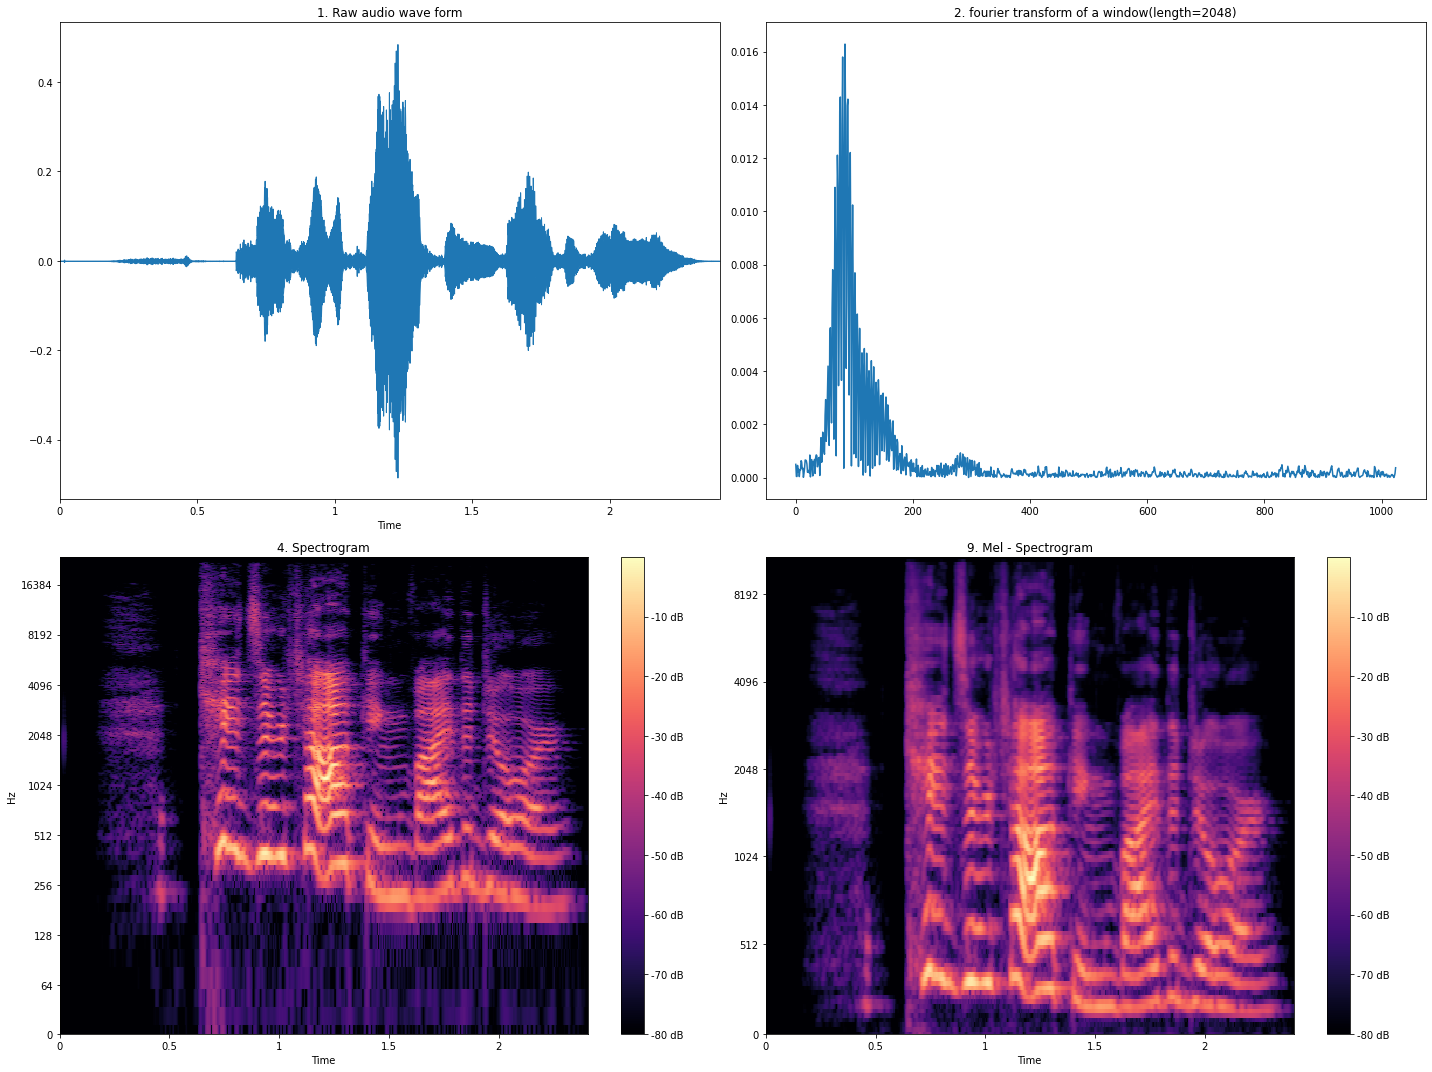

In [56]:
audio_loc = int(input("enter audio location value between 0 to 1439 :"))
path = audio_df.iloc[audio_loc]["Path"]
plot_audio_signal(path)

### References =======================================

1.  https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7
    
2.  Dataset : https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio
        
3.  https://medium.com/swlh/can-we-make-machines-understand-human-emotions-69d5d9f6ea3c
    
4.  https://link.springer.com/article/10.1007/s12559-019-09667-7
    
5.  https://towardsdatascience.com/using-cnns-and-rnns-for-music-genre-recognition-2435fb2ed6af
    
6.  https://github.com/IliaZenkov/transformer-cnn-emotion-recognition/blob/main/notebooks/Parallel_is_All_You_Want.ipynb
    
7.  https://towardsdatascience.com/deep-learning-on-dataframes-with-pytorch-66b21be54ef6
    
8.  https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/
    
9.  https://towardsdatascience.com/pytorch-layer-dimensions-what-sizes-should-they-be-and-why-4265a41e01fd
    
10. https://www.assemblyai.com/blog/end-to-end-speech-recognition-pytorch
    
11. http://www.speech.cs.cmu.edu/15-492/slides/03_mfcc.pdf
    
12. http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
    
13. https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/
    
14. https://pytorch.org/audio/stable/index.html
    
15. https://pytorch.org/docs/stable/index.html
    
16. https://pytorch.org/vision/stable/index.html
    
17. https://librosa.org/doc/latest/index.html
    
18. https://arxiv.org/abs/1706.03762